# Messi data exploration

Written report for this analysis can be found [here](../reports/messi_01_finding_leo.md)

In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib.patches import Arc #, Rectangle, ConnectionPatch
# from matplotlib.offsetbox import  OffsetImage

In [3]:
from src import utilities

In [4]:
df = utilities.get_master("events_shot")
df.shape

(12003, 22)

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,12003,NaN,NaN,NaN,6001,3465.11,0,3000.5,6001,9001.5,12002
season_id,12003,NaN,NaN,NaN,23.7796,13.6433,1,21,25,38,42
country_name,12003,1,Spain,12003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
competition_name,12003,1,La Liga,12003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season_name,12003,16,2017/2018,972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
match_id,12003,NaN,NaN,NaN,128067,104482,9575,69139,69292,266320,303731
match_date,12003,485,2018-10-20,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kick_off,12003,23,20:00:00.000,2194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,12003,NaN,NaN,NaN,23.7796,13.6433,1,21,25,38,42
event_type,12003,1,shot,12003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
total_matches = len(df.match_date.unique())
total_matches

485

In [7]:
messi_fullname = "Lionel AndrÃ©s Messi Cuccittini"
messi_fullname

'Lionel AndrÃ©s Messi Cuccittini'

In [8]:
df["shot"] = 1
df["goal"] = 0
df.loc[df.outcome == "Goal", "goal"] = 1

# df["shot_efficiency_diff"] = 1 + df.goal - df.shot
df["shot_skill_diff"] = df.goal - df.statsbomb_xg

df["is_Messi"] = (df.player == messi_fullname)
df["month"] = df.match_date.str.split("-", expand=True)[1]
df["10_minute_bin"] = df.minute.round(-1) #pd.cut(df.minute, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

df.iloc[:, -6:].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
shot,12003,NaN,NaN,NaN,1,0,1,1,1,1,1
goal,12003,NaN,NaN,NaN,0.137049,0.343913,0,0,0,0,1
shot_skill_diff,12003,NaN,NaN,NaN,0.0120991,0.299885,-0.871731,-0.0959426,-0.0408092,-0.0183419,0.990624
is_Messi,12003,2,False,9841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,12003,12,02,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10_minute_bin,12003,NaN,NaN,NaN,47.7764,26.5068,0,20,50,70,100


In [34]:
# df["is_Messi"] = (df.player == messi_fullname)
# df.is_Messi.value_counts()

In [35]:
# df["shot"] = 1
# df["goal"] = 0
# df.loc[df.outcome == "Goal", "goal"] = 1

# df.groupby("is_Messi")[["shot", "goal", "statsbomb_xg"]].describe(percentiles=[]).T.unstack([1])

In [36]:
# df["month"] = df.match_date.str.split("-", expand=True)[1]
# df["month"].describe()

In [37]:
# df["minute_bin"] = df.minute.round(-1) #pd.cut(df.minute, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
# df["minute_bin"].describe()

In [82]:
# mpg = df[df.is_Messi].groupby("match_date")[["shot", "goal", "statsbomb_xg", "shot_skill_diff"]].sum()
# mpg.describe()

In [9]:
## shots, goals, xg, efficiency, skill
summary = df.groupby(["is_Messi", "match_date"])[["shot", "goal", "statsbomb_xg", "shot_skill_diff"]].sum()\
            .sum(level="is_Messi") / total_matches
summary["shot_skill_%"] = summary.goal / summary.statsbomb_xg
summary["shot_efficiency_%"] = summary.goal / summary.shot
summary.sort_index(ascending=False).T

is_Messi,True,False
shot,4.457732,20.290722
goal,0.915464,2.476289
statsbomb_xg,0.700319,2.392000
shot_skill_diff,0.215145,0.084289
shot_skill_%,1.307210,1.035238
shot_efficiency_%,0.205365,0.122040


In [10]:
## volume
print("Messi take {0}% of all shots taken".format(100 * summary.iloc[1, 0] / summary.shot.sum()))

Messi take 18.012163625760227% of all shots taken


## Trends over time

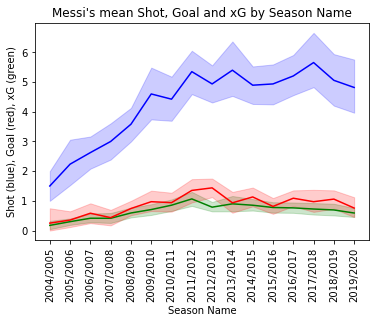

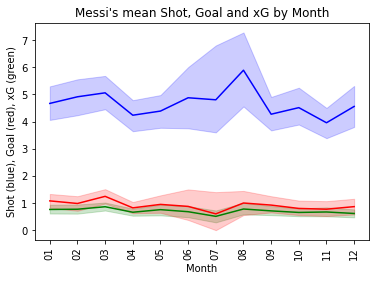

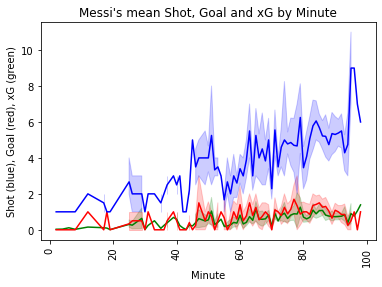

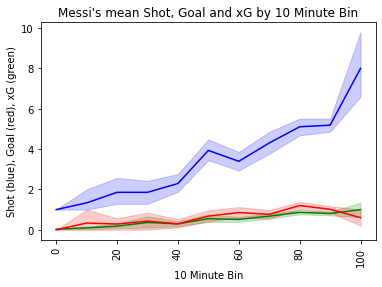

In [11]:
for x_col in ["season_name", "month", "minute", "10_minute_bin"]:
    x_disp = x_col.title().replace("_", " ")
    x_agg = "mean"
    x_data = df[df.is_Messi].groupby("match_date").agg({x_col: max,
                                                       "statsbomb_xg": sum,
                                                       "goal": sum,
                                                       "shot": sum,}).sort_values(by=x_col)

    ax = sns.lineplot(data=x_data, x=x_col, y="statsbomb_xg", estimator=x_agg, color="g")

    ax.set(xlabel=x_disp, ylabel='Shot (blue), Goal (red), xG (green)')
    plt.setp(ax.get_xticklabels(), rotation=90)

    sns.lineplot(data=x_data, x=x_col, y="goal", estimator=x_agg, color="r")

    sns.lineplot(data=x_data, x=x_col, y="shot", estimator=x_agg, color="b")

    plt.title("Messi's {0} Shot, Goal and xG by {1}".format(x_agg, x_disp))

    plt.show()

## Where shots are taken from

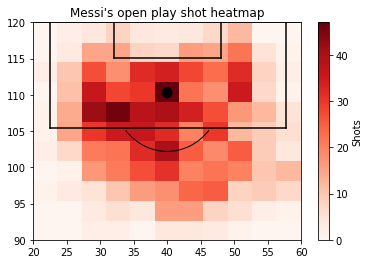

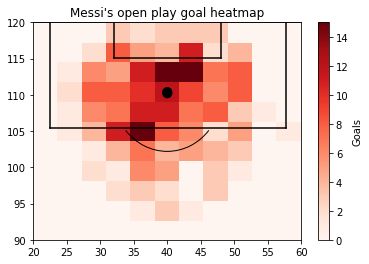

In [57]:
for metric_col in ["shot", "goal"]:
    data = df[(df.is_Messi) & (df.type == "Open Play") & (df[metric_col] == 1)]

    plt.hist2d(data.start_location_y, data.start_location_x, bins=11, range=[[20, 60], [90, 120]], cmap="Reds")
#     plt.hexbin(data.start_location_y, data.start_location_x, gridsize=13, cmap="Reds")
#     sns.jointplot(x="start_location_y", y="start_location_x", data=data, kind="hex")

    cb = plt.colorbar()
    cb.set_label("{0}s".format(metric_col.title()))

    ax = plt.gca()
    utilities.draw_pen_box(ax)

    plt.title("Messi's open play {0} heatmap".format(metric_col))
    plt.show()

In [88]:
metric_col = "statsbomb_xg"
df[(df.is_Messi) & (df.type == "Open Play")]\
            .groupby(["start_location_x", "start_location_y"])[metric_col].sum().unstack().fillna(0)

start_location_y,17.9,18.3,19.2,21.0,21.4,21.7,22.0,22.9,23.6,23.7,...,59.7,59.8,60.0,60.1,60.6,61.0,61.1,62.1,62.4,75.1
start_location_x,,,,,,,,,,,,,,,,,,,,,
66.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
72.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058289
85.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
86.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
87.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
119.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


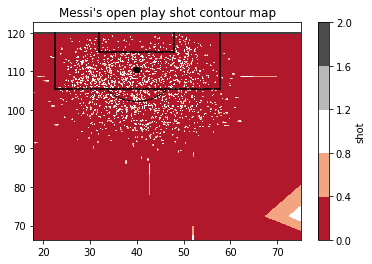

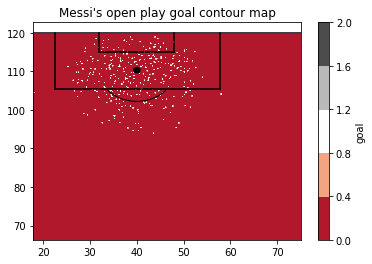

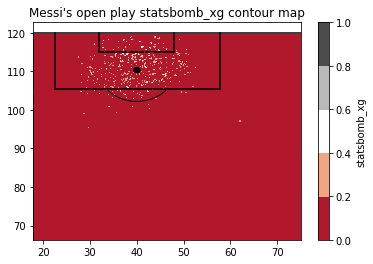

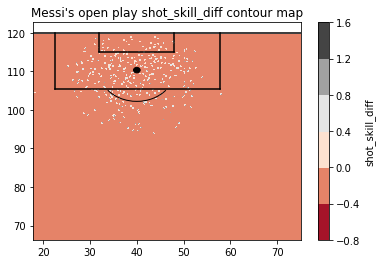

In [106]:
for metric_col in ["shot", "goal", "statsbomb_xg", "shot_skill_diff"]:
    data = df[(df.is_Messi) & (df.type == "Open Play")]\
            .groupby(["start_location_x", "start_location_y"])[metric_col].sum().unstack().fillna(0)
    x = data.columns
    y = data.index
    z = data.values
    
#     assert len(z) == (len(x) * len(y))

#     plt.contour(x, y, z, 5, cmap="RdGy")
    plt.contourf(x, y, z, 5, cmap="RdGy")
#     sns.kdeplot(data=data, x="start_location_y", y="start_location_x", weights=metric_col,
#                 cmap="viridis", cbar=True #fill=True
#                )

    cb = plt.colorbar()
    cb.set_label("{0}".format(metric_col))

    ax = plt.gca()
    utilities.draw_pen_box(ax)

    plt.title("Messi's open play {0} contour map".format(metric_col))
    plt.show()

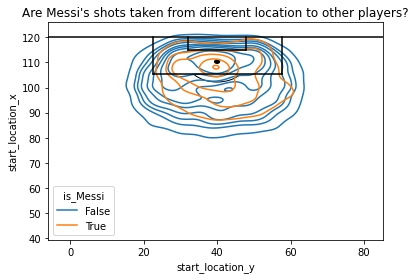

In [12]:
# sns.kdeplot(
#     data=df, x="start_location_y", y="start_location_x", hue="is_Messi", #fill=True,
# )

# ax = plt.gca()
# utilities.draw_pen_box(ax)

# plt.title("Are Messi's shots taken from different location to other players?")
# plt.show()

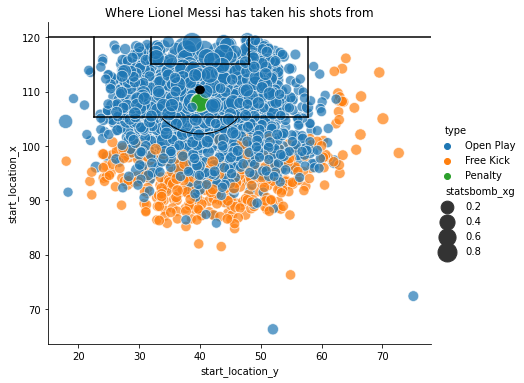

In [39]:
# fig = plt.figure()

# fig.set_size_inches(7, 5)
# ax=fig.add_subplot(1,1,1)
# g = sns.lmplot(x='start_location_x', y='start_location_y', size='statsbomb_xg', 
#            hue='team', data=shots, fit_reg=False, 
#            x_jitter=0.1, y_jitter=0.1, markers="o", palette="viridis") #, height=7)

g = sns.relplot(x='start_location_y', y='start_location_x', size='statsbomb_xg', hue="type",
            sizes=(100, 400), alpha=.7, aspect=1.2, height=5, 
                data=df[df.is_Messi])

ax = plt.gca()
utilities.draw_pen_box(ax)

plt.title("Where Lionel Messi has taken his shots from")
plt.show()

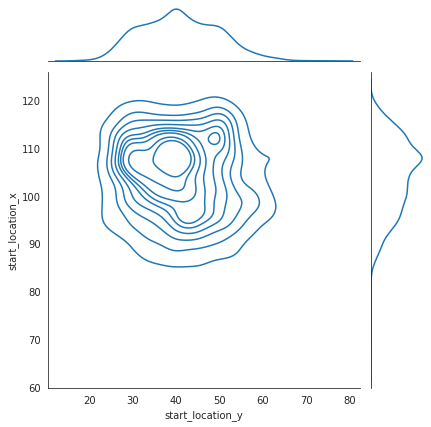

In [108]:
with sns.axes_style("white"):
    sns.jointplot(x="start_location_y", y="start_location_x", data=df[df.is_Messi], kind="kde");

## Where shots end up

In [109]:
# def draw_posts(ax):
    
#     ## 24ft x 8ft
#     x1 = 36.
#     x2 = 44.
#     y1 = 0.
#     y2 = (x2 - x1) * 8. / 24.
    
#     x=[x1, x1, x2, x2]
#     y=[y1, y2, y2, y1]
    
#     plt.plot(x, y, color="black")
#     ax.axhline(y=0,color="black")

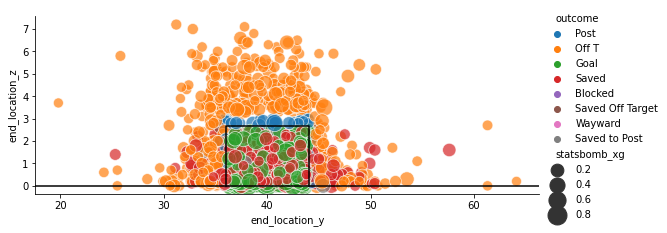

In [110]:
sns.relplot(x='end_location_y', y='end_location_z', size='statsbomb_xg', hue="outcome",
            sizes=(100, 400), alpha=.7, aspect=2.5, height=3, 
                data=df[df.is_Messi])

ax = plt.gca()
draw_posts(ax)
plt.show()

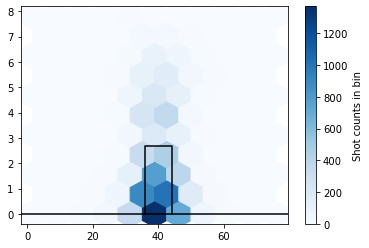

In [31]:
# plt.hist2d(shots.dropna(subset=["end_location_z"]).end_location_y, shots.dropna(subset=["end_location_z"]).end_location_z, bins=10, cmap="Blues")
plt.hexbin(df.dropna(subset=["end_location_z"]).end_location_y, df.dropna(subset=["end_location_z"]).end_location_z, 
           gridsize=10, cmap="Blues")
cb = plt.colorbar()
cb.set_label("Shot counts in bin")

ax = plt.gca()
draw_posts(ax)
plt.show()

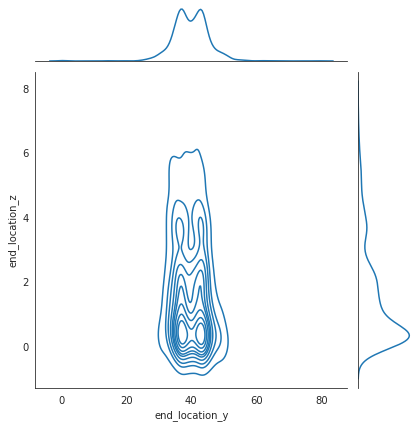

In [113]:
with sns.axes_style("white"):
    sns.jointplot(x="end_location_y", y="end_location_z", data=df[df.is_Messi], kind="kde");